# Mahalanobis Distance

**Understanding Covariance Matrix and Its Role in Bayesian Decision Theory**

In this tutorial, we will explore the covariance matrix, its geometric interpretation, and its role in Bayesian decision theory, particularly in Mahalanobis Distance. We will use resources from [Vision Dummy](https://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/), [SAS Blogs](https://blogs.sas.com/content/iml/2012/02/15/what-is-mahalanobis-distance.html) and [Wiki](https://en.wikipedia.org/wiki/Mahalanobis_distance) to explain the concepts, along with Chapter 2 of Duda's book {cite}`Duda2000`

---

## Why Do We Need Mahalanobis Distance?

In many real-world applications, we deal with multivariate data where features are often correlated and have different scales. The **Euclidean distance**, which measures the straight-line distance between two points, is a common choice for measuring distances. However, Euclidean distance has a significant limitation: it assumes that all features are uncorrelated and have the same variance. This assumption often does not hold in practice, leading to misleading results.

For example, consider a dataset where one feature is measured in meters and another in kilometers. The Euclidean distance would disproportionately weigh the feature measured in kilometers, even if it is less relevant to the problem. Similarly, if features are correlated, Euclidean distance fails to account for the underlying structure of the data.

This is where the **Mahalanobis distance** comes into play. Unlike Euclidean distance, the Mahalanobis distance takes into account the covariance structure of the data. It measures the distance between a point and a distribution, normalized by the variance of each feature and the correlations between them. This makes it a more robust and accurate measure for multivariate data.

### Python Example: Euclidean vs. Mahalanobis Distance

Let’s illustrate this with a Python example. We’ll generate a set of 2D Gaussian random points and highlight two points that have the same Euclidean distance to the center but different Mahalanobis distances.


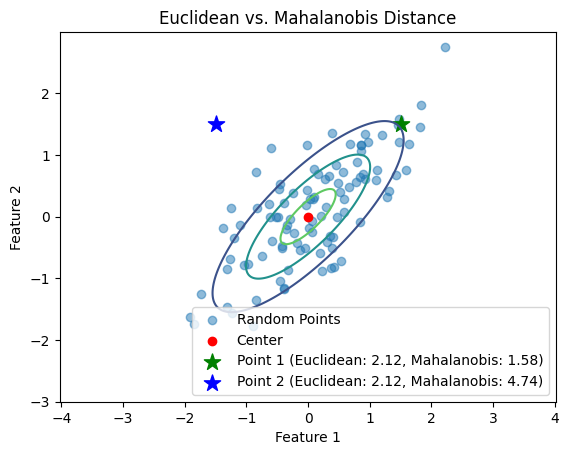

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from scipy.stats import multivariate_normal

# Generate 2D Gaussian random points
np.random.seed(42)
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]  # Covariance matrix
points = np.random.multivariate_normal(mean, cov, 100)

# Compute the center of the points
# center = np.mean(points, axis=0)
center = mean

# Select two points with equal Euclidean distance to the center
point1 = np.array([1.5, 1.5])
point2 = np.array([-1.5, 1.5])

# Compute Euclidean distances
euclidean_dist1 = np.linalg.norm(point1 - center)
euclidean_dist2 = np.linalg.norm(point2 - center)

# Compute Mahalanobis distances
inv_cov = np.linalg.inv(cov)
mahalanobis_dist1 = mahalanobis(point1, center, inv_cov)
mahalanobis_dist2 = mahalanobis(point2, center, inv_cov)

# Plot the points
plt.scatter(points[:, 0], points[:, 1], alpha=0.5, label='Random Points')
plt.scatter(center[0], center[1], color='red', label='Center')
plt.scatter(point1[0], point1[1], color='green', marker='*', s=150, label=f'Point 1 (Euclidean: {euclidean_dist1:.2f}, Mahalanobis: {mahalanobis_dist1:.2f})')
plt.scatter(point2[0], point2[1], color='blue', marker='*', s=150, label=f'Point 2 (Euclidean: {euclidean_dist2:.2f}, Mahalanobis: {mahalanobis_dist2:.2f})')

# Create a grid of points
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))

# Compute the Gaussian distribution on the grid
rv = multivariate_normal(mean, cov)
plt.contour(x, y, rv.pdf(pos), levels=3, cmap='viridis')

plt.legend()
plt.title('Euclidean vs. Mahalanobis Distance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis('equal') 
plt.show()


---

## Introduction to Covariance Matrix

The **covariance matrix** is a square matrix that summarizes the variances and covariances of a set of random variables. For a dataset with $d$ features, the covariance matrix $\mathbf{\Sigma}$ is a $d \times d$ matrix where the diagonal elements represent the variances of each feature, and the off-diagonal elements represent the covariances between pairs of features.

Mathematically, the covariance matrix is defined as:

$$
\mathbf{\Sigma} = \begin{bmatrix}
\sigma_{11} & \sigma_{12} & \cdots & \sigma_{1d} \\
\sigma_{21} & \sigma_{22} & \cdots & \sigma_{2d} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{d1} & \sigma_{d2} & \cdots & \sigma_{dd}
\end{bmatrix}
$$

where:
- $\sigma_{ii}$ is the variance of the $i$-th feature.
- $\sigma_{ij}$ is the covariance between the $i$-th and $j$-th features.

The covariance matrix is symmetric ($\sigma_{ij} = \sigma_{ji}$) and positive semi-definite.

---

## Geometric Interpretation of Covariance Matrix

The covariance matrix can be interpreted geometrically as describing the shape and orientation of the data distribution in the feature space. Here’s how:

1. **Eigenvalues and Eigenvectors**: The eigenvectors of the covariance matrix represent the directions (axes) of maximum variance in the data, while the eigenvalues represent the magnitude of variance along these directions.
   
2. **Ellipsoid Representation**: The covariance matrix defines an ellipsoid in the feature space. The eigenvectors determine the orientation of the ellipsoid, and the eigenvalues determine the lengths of its axes. For example, in a 2D space, the covariance matrix defines an ellipse.

3. **Scaling and Rotation**: The covariance matrix can be decomposed into scaling and rotation components. The eigenvalues represent the scaling factors, and the eigenvectors represent the rotation of the ellipsoid.

![Covariance Shape of the Data](img/cov-shape-of-data.png)

The covariance matrix defines the shape of the data. Diagonal spread is captured by the covariance, while axis-aligned spread is captured by the variance.


![Covariance Ellipse](img/cov-eigenvectors.png)

Geometric interpretation of the covariance matrix as an ellipse in 2D space. The eigenvectors determine the orientation, and the eigenvalues determine the lengths of the axes.

---

## Covariance Matrix in Bayesian Decision Theory

In [Bayesian decision theory(05.05-Bayesian-Decision-Theory.ipynb), the covariance matrix plays a crucial role in defining the **class-conditional probability density functions** for multivariate normal distributions. The probability density function for a multivariate normal distribution is given by:

$$p(\mathbf{x}|\omega_i) = \frac{1}{(2\pi)^{d/2}|\mathbf{\Sigma}_i|^{1/2}} \exp\left(-\frac{1}{2}(\mathbf{x} - \boldsymbol{\mu}_i)^T \mathbf{\Sigma}_i^{-1} (\mathbf{x} - \boldsymbol{\mu}_i)\right)$$

where:
- $\mathbf{x}$ is the feature vector.
- $\boldsymbol{\mu}_i$ is the mean vector for class $\omega_i$.
- $\mathbf{\Sigma}_i$ is the covariance matrix for class $\omega_i$.
- $d$ is the number of dimensions (features).

The covariance matrix $\mathbf{\Sigma}_i$ determines the shape and orientation of the probability distribution for class $\omega_i$. It captures both the variance of each feature (along the diagonal) and the covariance between pairs of features (off-diagonal elements).

---

## Mahalanobis Distance and Its Role

The **Mahalanobis distance** is a measure of the distance between a point $\mathbf{x}$ and a distribution with mean $\boldsymbol{\mu}$ and covariance matrix $\mathbf{\Sigma}$. It is defined as:

$$D_M(\mathbf{x}, \boldsymbol{\mu}) = \sqrt{(\mathbf{x} - \boldsymbol{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})}$$

This distance is central to many multivariate statistical methods, including Bayesian decision theory for classification, because it accounts for the underlying structure (variances and correlations) of the data.

<!-- ![Mahalanobis Distance(img/cov-figure-2.png)

*Figure 2: Mahalanobis distance accounts for the covariance structure of the data, unlike Euclidean distance.* -->

---

## Bridging from 1D Standardization to Multivariate Mahalanobis Distance

To understand the intuition behind Mahalanobis distance, let's first recall the familiar concept of **standardization** for a single normal random variable.

**The Univariate Case (1 Dimension):**

Suppose we have a normally distributed random variable $X$ with mean $\mu$ and variance $\sigma^2$. To measure how far an observed value $x$ is from the mean *relative to the spread of the distribution*, we calculate the **z-score**:

$$z = \frac{x - \mu}{\sigma}$$

The z-score tells us how many standard deviations $x$ is away from the mean $\mu$. It effectively removes the scale ($\sigma$) from the measurement, allowing comparison across different normal distributions.

Now, let's look at the squared z-score:

$$z^2 = \left(\frac{x - \mu}{\sigma}\right)^2 = \frac{(x - \mu)^2}{\sigma^2} = (x - \mu) (\sigma^2)^{-1} (x - \mu)$$

This $z^2$ represents a **squared, scale-normalized distance** from the mean. Notice its structure: `(difference) * (inverse variance) * (difference)`. Importantly, this squared z-score is exactly what appears (up to a factor of -1/2) in the exponent of the univariate normal probability density function:

$$p(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2} \frac{(x - \mu)^2}{\sigma^2}\right) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2} z^2\right)$$

So, the probability density decreases exponentially with this squared normalized distance $z^2$.

**Generalizing to Multiple Dimensions:**

When we move from one dimension ($\mathbb{R}^1$) to multiple dimensions ($\mathbb{R}^d$), we face two key challenges that simple Euclidean distance ($\sqrt{\sum (x_i - \mu_i)^2}$) doesn't handle well:

1.  **Different Scales:** Each dimension (feature) might have a different variance. Euclidean distance treats all dimensions equally, effectively giving more weight to dimensions with larger variances.
2.  **Correlation:** Features might be correlated. This means the data cloud isn't necessarily spherical or axis-aligned; it might be stretched and rotated into an ellipsoid shape. Euclidean distance ignores these correlations.

**The Mahalanobis Solution:**

The Mahalanobis distance is designed to address these challenges by incorporating the **covariance matrix** $\mathbf{\Sigma}$, which captures *both* the variances of individual features (on its diagonal) and the covariances between features (off-diagonal elements).

Let's look at the **squared Mahalanobis distance**:

$$D_M^2(\vec{x}, \vec{\mu}) = (\vec{x} - \vec{\mu})^\mathsf{T} \mathbf{\Sigma}^{-1} (\vec{x} - \vec{\mu})$$

Now, compare its structure directly to the squared z-score:

*   The vector difference $(\vec{x} - \vec{\mu})$ is the multivariate analog of the scalar difference $(x - \mu)$.
*   The **inverse covariance matrix** $\mathbf{\Sigma}^{-1}$ is the multivariate analog of the **inverse variance** $(\sigma^2)^{-1}$. It plays a crucial role:
    *   It accounts for the different variances along each dimension.
    *   It accounts for the correlations between dimensions, effectively "de-correlating" or "whitening" the space.

Just as $z^2$ appeared in the exponent of the univariate normal PDF, the **squared Mahalanobis distance** $D_M^2$ is precisely the term appearing in the exponent of the multivariate normal probability density function:

$$p(\mathbf{x}|\boldsymbol{\mu}, \mathbf{\Sigma}) \propto \exp\left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})\right) = \exp\left(-\frac{1}{2} D_M^2(\mathbf{x}, \boldsymbol{\mu})\right)$$


The Mahalanobis distance ($D_M = \sqrt{D_M^2}$) is the natural generalization of the standardized distance (z-score concept) to multiple dimensions. It provides a statistically meaningful measure of distance from the mean (center) of a multivariate distribution by properly accounting for the variances and correlations inherent in the data, as captured by the covariance matrix $\mathbf{\Sigma}$. It essentially measures distance in a transformed space where the data cloud is spherical and has unit variance in all directions.



---

## Definition of Mahalanobis Distance

Given a probability distribution $Q$ on $\mathbb{R}^N$, with mean $\vec{\mu} = (\mu_1, \mu_2, \mu_3, \dots , \mu_N)^\mathsf{T}$ and positive semi-definite covariance matrix $\mathbf{\Sigma}$, the Mahalanobis distance of a point $\vec{x} = (x_1, x_2, x_3, \dots, x_N )^\mathsf{T}$ from $Q$ is:

$$
d_M(\vec{x}, Q) = \sqrt{(\vec{x} - \vec{\mu})^\mathsf{T} \mathbf{\Sigma}^{-1} (\vec{x} - \vec{\mu})}.
$$

Given two points $\vec{x}$ and $\vec{y}$ in $\mathbb{R}^N$, the Mahalanobis distance between them with respect to $Q$ is:

$$
d_M(\vec{x}, \vec{y}; Q) = \sqrt{(\vec{x} - \vec{y})^\mathsf{T} \mathbf{\Sigma}^{-1} (\vec{x} - \vec{y})}.
$$

This means that $d_M(\vec{x}, Q) = d_M(\vec{x}, \vec{\mu}; Q)$.

Since $\mathbf{\Sigma}$ is positive semi-definite, so is $\mathbf{\Sigma}^{-1}$, thus the square roots are always defined.

---

## Intuitive Explanation of Mahalanobis Distance

Consider the problem of estimating the probability that a test point in $N$-dimensional Euclidean space belongs to a set, where we are given sample points that definitely belong to that set. Our first step would be to find the centroid or center of mass of the sample points. Intuitively, the closer the point in question is to this center of mass, the more likely it is to belong to the set.

However, we also need to know if the set is spread out over a large range or a small range, so that we can decide whether a given distance from the center is noteworthy or not. The simplistic approach is to estimate the standard deviation of the distances of the sample points from the center of mass. If the distance between the test point and the center of mass is less than one standard deviation, then we might conclude that it is highly probable that the test point belongs to the set. The further away it is, the more likely that the test point should not be classified as belonging to the set.

This intuitive approach can be made quantitative by defining the normalized distance between the test point and the set to be:

$$
\frac{\lVert x - \mu\rVert_2}{\sigma},
$$

which reads: 

$$
\frac{\text{testpoint} - \text{sample mean}}{\text{standard deviation}}.
$$

By plugging this into the normal distribution, we can derive the probability of the test point belonging to the set.

The drawback of the above approach is that we assumed that the sample points are distributed about the center of mass in a spherical manner. Were the distribution to be decidedly non-spherical, for instance ellipsoidal, then we would expect the probability of the test point belonging to the set to depend not only on the distance from the center of mass, but also on the direction. In those directions where the ellipsoid has a short axis, the test point must be closer, while in those where the axis is long, the test point can be further away from the center.

Putting this on a mathematical basis, the ellipsoid that best represents the set's probability distribution can be estimated by building the covariance matrix of the samples. The Mahalanobis distance is the distance of the test point from the center of mass divided by the width of the ellipsoid in the direction of the test point.


## Whitening Transformation

Whitening is a process that transforms data so that its covariance matrix becomes the identity matrix. This transformation removes correlations between features and scales the features to have unit variance. Whitening is particularly useful in machine learning and signal processing because it simplifies the structure of the data, making it easier to apply algorithms that assume uncorrelated features.

![Figure 2.8 of Duda](img/Duda-Figure-2.8.png)

Figure 2.8 {cite}`Duda2000`: The action of a linear transformation on the feature space will convert an arbitrary normal distribution into another normal distribution. 

### Mathematical Formulation

Given a dataset with mean $\boldsymbol{\mu}$ and covariance matrix $\mathbf{\Sigma}$, the whitening transformation is defined as:

$$
\mathbf{x}_{\text{whitened}} = W^T (\mathbf{x} - \boldsymbol{\mu}),
$$

where $W$ is the **whitening matrix**. The whitening matrix is constructed using the eigenvectors $\mathbf{\Phi}$ and eigenvalues $\mathbf{\Lambda}$ of the covariance matrix $\mathbf{\Sigma}$:

$$
W = \mathbf{\Phi} \mathbf{\Lambda}^{-1/2}.
$$

Here:
- $\mathbf{\Phi}$ is the matrix of eigenvectors of $\mathbf{\Sigma}$.
- $\mathbf{\Lambda}$ is the diagonal matrix of eigenvalues of $\mathbf{\Sigma}$.
- $\mathbf{\Lambda}^{-1/2}$ is the diagonal matrix of the inverse square roots of the eigenvalues.

After applying the whitening transformation, the covariance matrix of the transformed data becomes the identity matrix $\mathbf{I}$:

$$
\text{Cov}(\mathbf{x}_{\text{whitened}}) = \mathbf{I}.
$$

### Geometric Interpretation

Whitening can be thought of as a two-step process:
1. **Rotation**: The data is rotated using the eigenvectors $\mathbf{\Phi}$ to align the axes of the ellipsoid (defined by the covariance matrix) with the coordinate axes.
2. **Scaling**: The data is scaled along each axis by the inverse square root of the eigenvalues $\mathbf{\Lambda}^{-1/2}$ to normalize the variances.

In the whitened space, the data is uncorrelated, and the Euclidean distance between points reflects the true structure of the data, accounting for the original covariance.

### Relationship to Mahalanobis Distance

The Mahalanobis distance in the original space is equivalent to the Euclidean distance in the whitened space. This is because whitening normalizes the data so that the Euclidean distance accounts for the covariance structure. Specifically:

$$
D_M(\mathbf{x}) = \sqrt{(\mathbf{x} - \boldsymbol{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})} = \|\mathbf{x}_{\text{whitened}}\|_2,
$$

where $\|\cdot\|_2$ is the Euclidean norm.

### Example: Whitening in Python

The following Python code demonstrates how to whiten a dataset:

```python
import numpy as np

# Generate 2D Gaussian random points
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]  # Covariance matrix
points = np.random.multivariate_normal(mean, cov, 100)

# Compute the whitening matrix
eigenvals, eigenvecs = np.linalg.eigh(cov)
D = np.diag(1.0 / np.sqrt(eigenvals))  # Diagonal matrix of inverse square roots of eigenvalues
W = np.dot(eigenvecs, D)  # Whitening matrix

# Whiten the data
whitened_points = np.dot(points - mean, W)

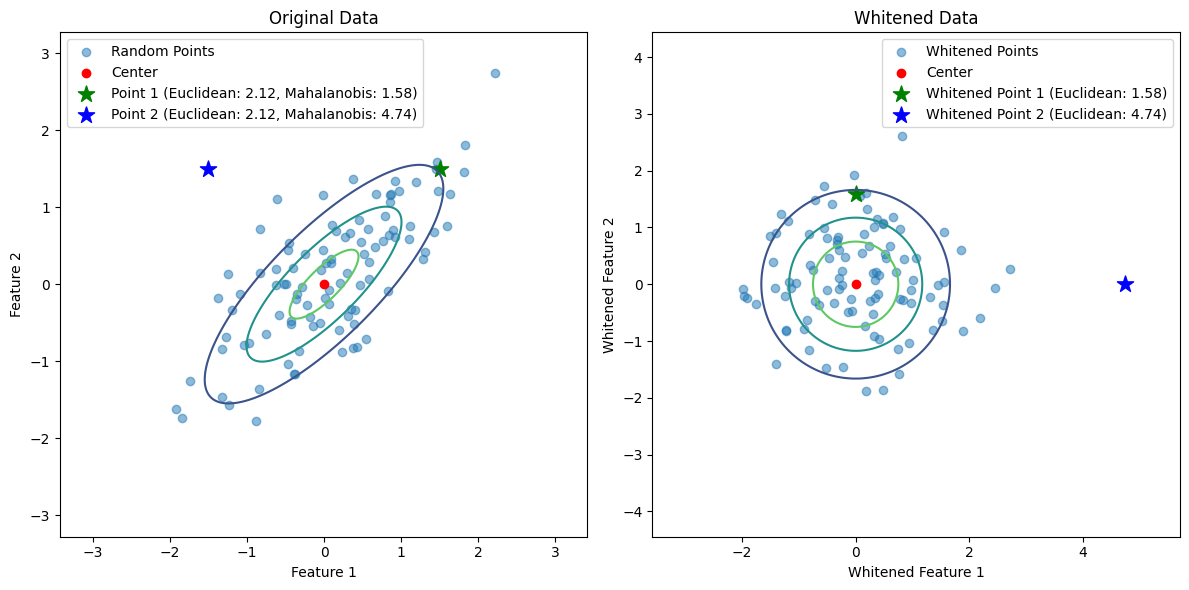

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from scipy.stats import multivariate_normal

# Generate 2D Gaussian random points
np.random.seed(42)
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]  # Covariance matrix
points = np.random.multivariate_normal(mean, cov, 100)

# The center
center = mean

# Select two points with equal Euclidean distance to the center
point1 = np.array([1.5, 1.5])
point2 = np.array([-1.5, 1.5])

# Compute Euclidean distances
euclidean_dist1 = np.linalg.norm(point1 - center)
euclidean_dist2 = np.linalg.norm(point2 - center)

# Compute Mahalanobis distances
inv_cov = np.linalg.inv(cov)
mahalanobis_dist1 = mahalanobis(point1, center, inv_cov)
mahalanobis_dist2 = mahalanobis(point2, center, inv_cov)

# Whitening the data based on Duda's book
# Step 1: Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvals, eigenvecs = np.linalg.eigh(cov)

# Step 2: Construct the whitening matrix
D = np.diag(1.0 / np.sqrt(eigenvals))  # Diagonal matrix of inverse square roots of eigenvalues
W = np.dot(eigenvecs, D)  # Whitening matrix

# Step 3: Whiten the data
whitened_points = np.dot(points - center, W)  # Subtract mean and apply whitening transformation
whitened_point1 = np.dot(point1 - center, W)
whitened_point2 = np.dot(point2 - center, W)

# Compute Euclidean distances in the whitened space
whitened_euclidean_dist1 = np.linalg.norm(whitened_point1)
whitened_euclidean_dist2 = np.linalg.norm(whitened_point2)

# Plot the original and whitened data
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(points[:, 0], points[:, 1], alpha=0.5, label='Random Points')
plt.scatter(center[0], center[1], color='red', label='Center')
plt.scatter(point1[0], point1[1], color='green', marker='*', s=150, label=f'Point 1 (Euclidean: {euclidean_dist1:.2f}, Mahalanobis: {mahalanobis_dist1:.2f})')
plt.scatter(point2[0], point2[1], color='blue', marker='*', s=150, label=f'Point 2 (Euclidean: {euclidean_dist2:.2f}, Mahalanobis: {mahalanobis_dist2:.2f})')

# Create a grid of points for the original data
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))

# Compute the Gaussian distribution on the grid
rv = multivariate_normal(mean, cov)
plt.contour(x, y, rv.pdf(pos), levels=3, cmap='viridis')

plt.legend()
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis('equal')

# Plot whitened data
plt.subplot(1, 2, 2)
plt.scatter(whitened_points[:, 0], whitened_points[:, 1], alpha=0.5, label='Whitened Points')
plt.scatter(0, 0, color='red', label='Center')
plt.scatter(whitened_point1[0], whitened_point1[1], color='green', marker='*', s=150, label=f'Whitened Point 1 (Euclidean: {whitened_euclidean_dist1:.2f})')
plt.scatter(whitened_point2[0], whitened_point2[1], color='blue', marker='*', s=150, label=f'Whitened Point 2 (Euclidean: {whitened_euclidean_dist2:.2f})')

# Create a grid of points for the whitened data
x_whitened, y_whitened = np.mgrid[-3:3:.01, -3:3:.01]
pos_whitened = np.dstack((x_whitened, y_whitened))

# Compute the Gaussian distribution on the grid for whitened data
rv_whitened = multivariate_normal([0, 0], np.eye(2))  # Covariance matrix is identity after whitening
plt.contour(x_whitened, y_whitened, rv_whitened.pdf(pos_whitened), levels=3, cmap='viridis')

plt.legend()
plt.title('Whitened Data')
plt.xlabel('Whitened Feature 1')
plt.ylabel('Whitened Feature 2')
plt.axis('equal')

plt.tight_layout()
plt.show()

- Left: The original data with points and their Euclidean/Mahalanobis distances.
- Right: The whitened data with points and their Euclidean distances.

### Applications of Whitening

1. **Data Preprocessing**: Whitening is often used as a preprocessing step in machine learning algorithms, such as Principal Component Analysis (PCA) and Independent Component Analysis (ICA), to improve performance.
2. **Signal Processing**: In signal processing, whitening is used to decorrelate signals and remove redundancy.
3. **Visualization**: Whitening can simplify the visualization of high-dimensional data by removing correlations and scaling features.

---

## Conclusion

The **covariance matrix** is a fundamental concept in multivariate statistics and Bayesian decision theory. It describes the shape, orientation, and scale of data distributions and plays a key role in defining class-conditional probability densities. The **Mahalanobis distance**, which incorporates the covariance matrix, is a powerful tool for classification tasks, especially when dealing with correlated features.

By understanding the geometric interpretation of the covariance matrix and its role in Bayesian decision theory, you can better analyze and classify multivariate data. 